In [1]:
import os

dataset_path = "D:/dataset/img_resized"
print("Files in dataset:", os.listdir(dataset_path)[:10]


Files in dataset: ['1023940590382268417.jpg', '1023940826882293760.jpg', '1023940897346658307.jpg', '1023942214844657664.jpg', '1023942220838264837.jpg', '1023942343202881536.jpg', '1023943177319919616.jpg', '1023943945670148096.jpg', '1023943955023519744.jpg', '1023944988365709312.jpg']


In [3]:
!pip install opencv-python


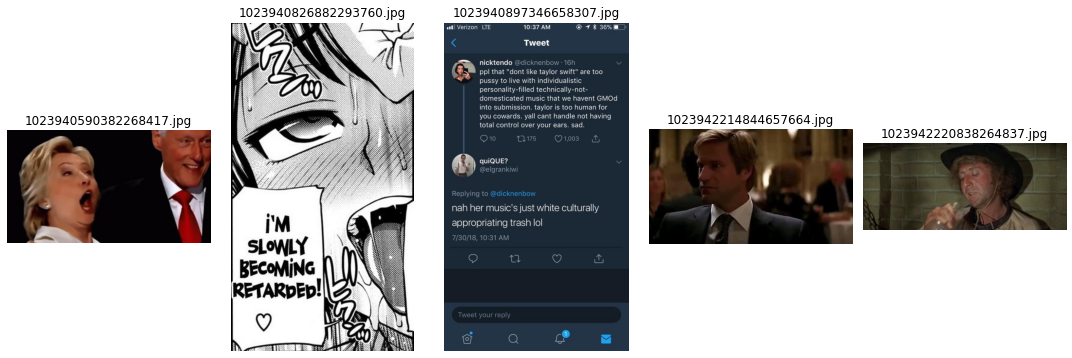

In [6]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to your dataset folder in D drive
dataset_path = "D:/dataset/img_resized"

# Get list of first 5 image files
image_files = sorted([f for f in os.listdir(dataset_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])[:5]

# Check if images exist
if not image_files:
    print("No image files found in the directory!")
else:
    # Plot first 5 images
    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(image_files):
        img_path = os.path.join(dataset_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

        plt.subplot(1, 5, i + 1)  # 1 row, 5 columns
        plt.imshow(img)
        plt.title(img_name[:30])  # Show truncated name
        plt.axis("off")

    plt.tight_layout()
    plt.show()


In [7]:
# Define paths
DATA_ROOT = 'D:/dataset'
IMG_DIR = os.path.join(DATA_ROOT, 'img_resized')
GT_FILE = os.path.join(DATA_ROOT, 'MMHS150K_GT.json')
TRAIN_IDS = os.path.join(DATA_ROOT, 'splits', 'train_ids.txt')
VAL_IDS = os.path.join(DATA_ROOT, 'splits', 'val_ids.txt')
TEST_IDS = os.path.join(DATA_ROOT, 'splits', 'test_ids.txt')

In [9]:
import json
def load_ground_truth():
    """Load the ground truth JSON file with metadata and labels."""
    with open(GT_FILE, 'r') as f:
        gt_data = json.load(f)
    return gt_data

def load_ids_from_file(file_path):
    """Load image IDs from a file."""
    with open(file_path, 'r') as f:
        return [line.strip() for line in f.readlines()]

# Load ground truth data
gt_data = load_ground_truth()
print(f"Total number of samples: {len(gt_data)}")

Total number of samples: 149823


In [10]:
# Display a few examples
for idx, (img_id, metadata) in enumerate(list(gt_data.items())[:5]):
    print(f"\nExample {idx+1}:")
    print(f"Image ID: {img_id}")
    print(f"Labels: {metadata['labels']} ({metadata['labels_str']})")
    print(f"Tweet Text: {metadata['tweet_text']}")


Example 1:
Image ID: 1114679353714016256
Labels: [4, 1, 3] (['Religion', 'Racist', 'Homophobe'])
Tweet Text: @FriskDontMiss Nigga https://t.co/cAsaLWEpue

Example 2:
Image ID: 1063020048816660480
Labels: [5, 5, 5] (['OtherHate', 'OtherHate', 'OtherHate'])
Tweet Text: My horses are retarded https://t.co/HYhqc6d5WN

Example 3:
Image ID: 1108927368075374593
Labels: [0, 0, 0] (['NotHate', 'NotHate', 'NotHate'])
Tweet Text: “NIGGA ON MA MOMMA YOUNGBOY BE SPITTING REAL SHIT NIGGA” https://t.co/UczofqHrLq

Example 4:
Image ID: 1114558534635618305
Labels: [1, 0, 0] (['Racist', 'NotHate', 'NotHate'])
Tweet Text: RT xxSuGVNGxx: I ran into this HOLY NIGGA TODAY 😭😭😭😭 https://t.co/Wa6Spl9kIw

Example 5:
Image ID: 1035252480215592966
Labels: [1, 0, 1] (['Racist', 'NotHate', 'Racist'])
Tweet Text: “EVERYbody calling you Nigger now!” https://t.co/6mguJ6KIBF


In [11]:
# Load dataset splits
train_ids = load_ids_from_file(TRAIN_IDS)
val_ids = load_ids_from_file(VAL_IDS)
test_ids = load_ids_from_file(TEST_IDS)

print(f"Train set size: {len(train_ids)}")
print(f"Validation set size: {len(val_ids)}")
print(f"Test set size: {len(test_ids)}")

FileNotFoundError: [Errno 2] No such file or directory: 'D:/dataset\\splits\\train_ids.txt'

In [12]:
# Count label distribution in the original data
label_distribution = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
for metadata in gt_data.values():
    # Get majority vote for each sample
    labels = metadata['labels']
    majority_label = max(set(labels), key=labels.count)
    label_distribution[majority_label] += 1

print("Original label distribution (majority vote):")
label_names = ["NotHate", "Racist", "Sexist", "Homophobe", "Religion", "OtherHate"]
for label_idx, count in label_distribution.items():
    percentage = count / len(gt_data) * 100
    print(f"{label_names[label_idx]} ({label_idx}): {count} ({percentage:.2f}%)")

Original label distribution (majority vote):
NotHate (0): 124003 (82.77%)
Racist (1): 12288 (8.20%)
Sexist (2): 3671 (2.45%)
Homophobe (3): 3886 (2.59%)
Religion (4): 164 (0.11%)
OtherHate (5): 5811 (3.88%)


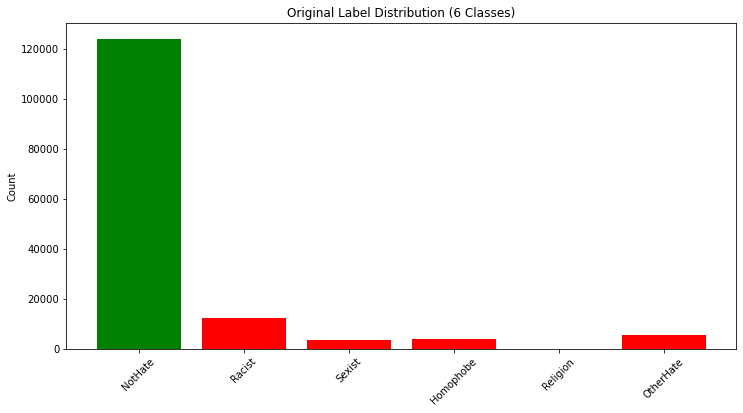

In [13]:
# Plot the original label distribution
plt.figure(figsize=(12, 6))
plt.bar(label_names, [label_distribution[i] for i in range(6)], 
       color=['green', 'red', 'red', 'red', 'red', 'red'])
plt.title('Original Label Distribution (6 Classes)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [14]:
def convert_to_binary(labels):
    """
    Convert the 6-class labels to binary labels.
    
    Args:
        labels: List of original labels (0-5)
        
    Returns:
        Binary label (0 for NotHate, 1 for Hate)
    """
    # For each annotator's label, convert to binary (0 remains 0, 1-5 become 1)
    binary_labels = [1 if label > 0 else 0 for label in labels]
    
    # Take majority vote for the final label
    return round(sum(binary_labels) / len(binary_labels))

# Process all data and create a binary label mapping
binary_labels = {}
for img_id, metadata in gt_data.items():
    binary_labels[img_id] = convert_to_binary(metadata['labels'])

# Count the distribution of binary labels
label_counts = {0: 0, 1: 0}
for label in binary_labels.values():
    label_counts[label] += 1

print("Binary label distribution:")
print(f"NotHate (0): {label_counts[0]} ({label_counts[0]/len(binary_labels)*100:.2f}%)")
print(f"Hate (1): {label_counts[1]} ({label_counts[1]/len(binary_labels)*100:.2f}%)")

Binary label distribution:
NotHate (0): 112858 (75.33%)
Hate (1): 36965 (24.67%)


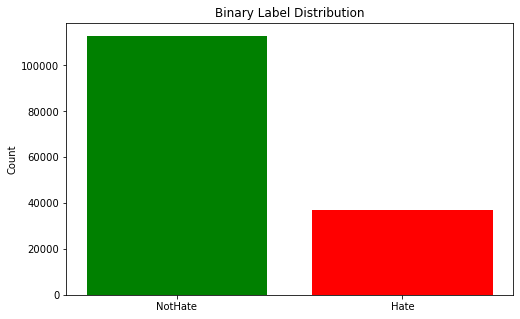

In [15]:
# Plot the binary label distribution
plt.figure(figsize=(8, 5))
binary_labels_names = ['NotHate', 'Hate']
counts = [label_counts[0], label_counts[1]]
plt.bar(binary_labels_names, counts, color=['green', 'red'])
plt.title('Binary Label Distribution')
plt.ylabel('Count')
plt.show()


In [16]:
# Save binary labels to a file
with open('binary_labels.json', 'w') as f:
    json.dump(binary_labels, f)

print("Binary labels saved to binary_labels.json")

Binary labels saved to binary_labels.json


In [17]:
def load_binary_labels(json_path='binary_labels.json'):
    """Load binary labels from a JSON file."""
    with open(json_path, 'r') as f:
        binary_labels = json.load(f)
    return binary_labels

In [19]:
from tensorflow.keras.utils import Sequence  # <-- Add this line

class MMHS150KSequence(Sequence):
    """Custom data generator for the MMHS150K dataset."""
    
    def __init__(self, img_dir, binary_labels, img_ids, batch_size=32, 
                 img_size=(224, 224), shuffle=True):
        """
        Initialize the data generator.
        
        Args:
            img_dir (str): Directory with all the images
            binary_labels (dict): Dictionary mapping image IDs to binary labels
            img_ids (list): List of image IDs to include in this dataset
            batch_size (int): Batch size
            img_size (tuple): Target image size (height, width)
            shuffle (bool): Whether to shuffle the data after each epoch
        """
        self.img_dir = img_dir
        self.binary_labels = binary_labels
        self.batch_size = batch_size
        self.img_size = img_size
        self.shuffle = shuffle
        
        # Filter to include only images that exist
        self.valid_img_ids = []
        for img_id in img_ids:
            if img_id in binary_labels and os.path.exists(os.path.join(img_dir, f"{img_id}.jpg")):
                self.valid_img_ids.append(img_id)
        
        print(f"Found {len(self.valid_img_ids)} valid images out of {len(img_ids)} IDs")
        
        # Create indices and shuffle if needed
        self.indices = np.arange(len(self.valid_img_ids))
        if self.shuffle:
            np.random.shuffle(self.indices)
    
    def __len__(self):
        """Return the number of batches per epoch."""
        return int(np.ceil(len(self.valid_img_ids) / self.batch_size))
    
    def __getitem__(self, idx):
        """Get batch at index idx."""
        # Get batch indices
        batch_indices = self.indices[idx * self.batch_size:(idx + 1) * self.batch_size]
        
        # Initialize batch arrays
        batch_x = np.zeros((len(batch_indices), self.img_size[0], self.img_size[1], 3), dtype=np.float32)
        batch_y = np.zeros(len(batch_indices), dtype=np.int32)
        batch_ids = []
        
        # Load and preprocess images
        for i, idx in enumerate(batch_indices):
            img_id = self.valid_img_ids[idx]
            img_path = os.path.join(self.img_dir, f"{img_id}.jpg")
            
            try:
                # Load and preprocess image
                img = Image.open(img_path).convert('RGB')
                img = img.resize(self.img_size)
                img_array = img_to_array(img)
                
                # Preprocess for the appropriate model
                # For ResNet: normalize with the ImageNet statistics
                img_array = img_array / 255.0
                img_array = (img_array - [0.485, 0.456, 0.406]) / [0.229, 0.224, 0.225]
                
                batch_x[i] = img_array
                batch_y[i] = self.binary_labels[img_id]
                batch_ids.append(img_id)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
                # Use zeros for failed images
                batch_x[i] = np.zeros((self.img_size[0], self.img_size[1], 3))
                batch_y[i] = self.binary_labels[img_id]  # Use label anyway
                batch_ids.append(img_id)
        
        return batch_x, batch_y, batch_ids
    
    def on_epoch_end(self):
        """Called at the end of each epoch."""
        if self.shuffle:
            np.random.shuffle(self.indices)
    
    def get_sample(self, idx):
        """Get a single sample for visualization."""
        img_id = self.valid_img_ids[idx]
        img_path = os.path.join(self.img_dir, f"{img_id}.jpg")
        
        try:
            # Load image
            img = Image.open(img_path).convert('RGB')
            img = img.resize(self.img_size)
            img_array = img_to_array(img)
            
            # Normalize the image (for visualization)
            img_array = img_array / 255.0
            
            # Get label
            label = self.binary_labels[img_id]
            
            return img_array, label, img_id
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            return np.zeros((self.img_size[0], self.img_size[1], 3)), self.binary_labels[img_id], img_id

In [20]:
train_ids = sorted([f.split('.')[0] for f in os.listdir(IMG_DIR) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])[:1000]

print(f"Selected {len(train_ids)} images for training.")

Selected 1000 images for training.


In [22]:
import numpy as np
# Create a sample data generator with a subset of train images
sample_train_ids = train_ids[:1000]  # Use a small subset for faster processing
sample_generator = MMHS150KSequence(IMG_DIR, binary_labels, sample_train_ids, batch_size=32)

Found 1000 valid images out of 1000 IDs


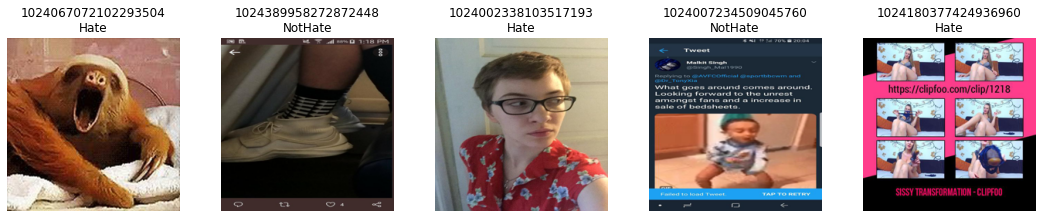

In [26]:
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array

def visualize_samples(data_generator, num_samples=3):
    """
    Visualize random samples from the dataset.
    
    Args:
        data_generator (MMHS150KSequence): Data generator
        num_samples (int): Number of samples to visualize
    """
    # Create a figure
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    
    # Generate random indices
    indices = np.random.choice(len(data_generator.valid_img_ids), num_samples, replace=False)
    
    # Display each image
    for i, idx in enumerate(indices):
        img_array, label, img_id = data_generator.get_sample(idx)
        
        axes[i].imshow(img_array)
        axes[i].set_title(f"{img_id}\n{'Hate' if label == 1 else 'NotHate'}")
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize some samples
visualize_samples(sample_generator, num_samples=5)

In [27]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, ResNet101, EfficientNetB0, VGG16, MobileNetV2
from tensorflow.keras.models import Model

def get_feature_extractor(model_name='resnet50', img_size=(224, 224)):
    """
    Create a feature extractor from a pre-trained CNN model.
    
    Args:
        model_name (str): Name of the model to use
        img_size (tuple): Input image size (height, width)
        
    Returns:
        Model: Feature extractor model
    """
    # Dictionary of available models
    models_dict = {
        'resnet50': ResNet50,
        'resnet101': ResNet101,
        'efficientnet_b0': EfficientNetB0,
        'vgg16': VGG16,
        'mobilenet_v2': MobileNetV2
    }
    
    # Ensure valid model name
    if model_name not in models_dict:
        raise ValueError(f"Unsupported model: {model_name}. Choose from {list(models_dict.keys())}")

    # Load the base model with pretrained ImageNet weights
    base_model = models_dict[model_name](
        weights='imagenet', 
        include_top=False, 
        input_shape=(img_size[0], img_size[1], 3)
    )
    
    # Prevent training for efficiency
    base_model.trainable = False

    # Add global average pooling to get a single feature vector per image
    x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

    # Create the feature extractor model
    feature_extractor = Model(inputs=base_model.input, outputs=x, name=f"{model_name}_feature_extractor")

    return feature_extractor


In [28]:
# Create feature extractor
model_name = 'resnet50'  # You can change this to 'resnet101' or 'efficientnet_b0'
img_size = (224, 224)
feature_extractor = get_feature_extractor(model_name=model_name, img_size=img_size)
print(f"Using {model_name} as feature extractor")

94765736/94765736 [==============================] - 25s 0us/step
Using resnet50 as feature extractor


In [29]:
def extract_features(data_generator, feature_extractor):
    """
    Extract features from images using a pre-trained model.
    
    Args:
        data_generator (MMHS150KSequence): Data generator
        feature_extractor (Model): Feature extractor model
        
    Returns:
        tuple: (features, labels, img_ids)
    """
    features = []
    labels = []
    img_ids = []
    
    for i in tqdm(range(len(data_generator)), desc="Extracting features"):
        batch_imgs, batch_labels, batch_ids = data_generator[i]
        
        # Extract features
        batch_features = feature_extractor.predict(batch_imgs, verbose=0)
        
        # Store results
        features.append(batch_features)
        labels.extend(batch_labels)
        img_ids.extend(batch_ids)
    
    # Concatenate features
    features = np.vstack(features)
    
    return features, np.array(labels), img_ids

In [31]:
from tqdm import tqdm

# Extract features from the sample dataset
sample_features, sample_labels, sample_img_ids = extract_features(sample_generator, feature_extractor)
print(f"Extracted features shape: {sample_features.shape}")

Extracting features: 100%|█████████████████████████████████████████████████████████████| 32/32 [04:03<00:00,  7.62s/it]

Extracted features shape: (1000, 2048)


In [33]:
!pip install torch torchvision torchaudio


In [34]:
import torch

# Convert extracted features to PyTorch tensor
sample_features_torch = torch.tensor(sample_features, dtype=torch.float32)
sample_labels_torch = torch.tensor(sample_labels, dtype=torch.long)  # If labels are integers

# Print shapes to confirm
print(f"Feature tensor shape: {sample_features_torch.shape}")  
print(f"Labels tensor shape: {sample_labels_torch.shape}")  

Feature tensor shape: torch.Size([1000, 2048])
Labels tensor shape: torch.Size([1000])


In [36]:
import torch
import torch.nn.functional as F
from sklearn.neighbors import NearestNeighbors
import numpy as np

def build_knn_hypergraph(features, k=5):
    """
    Construct hyperedges using k-Nearest Neighbors (k-NN).
    
    Args:
        features (torch.Tensor): Tensor of shape (N, D) where N is the number of images, D is the feature dimension.
        k (int): Number of neighbors to connect per node.
    
    Returns:
        torch.Tensor: Hypergraph incidence matrix H of shape (N, E), where E is the number of hyperedges.
    """
    N = features.shape[0]
    features_np = features.cpu().numpy()  # Convert to NumPy for k-NN computation
    
    # Compute k-NN graph
    knn = NearestNeighbors(n_neighbors=k + 1, metric='cosine').fit(features_np)
    neighbors = knn.kneighbors(features_np, return_distance=False)
    
    # Create hyperedges (excluding self-loops)
    hyperedges = []
    for i in range(N):
        hyperedges.append(set(neighbors[i][1:]))  # Exclude self (first entry is the node itself)
    
    # Convert to hypergraph incidence matrix (N x E)
    num_hyperedges = len(hyperedges)
    H = torch.zeros((N, num_hyperedges), dtype=torch.float32)
    
    for e, nodes in enumerate(hyperedges):
        for node in nodes:
            H[node, e] = 1.0  # Assign weight 1 to hyperedges
    
    return H

# Example usage:
k = 5  # Number of neighbors per node
H = build_knn_hypergraph(sample_features_torch, k)
print(f"Hypergraph Incidence Matrix Shape: {H.shape}")  # Should be (N, E)

Hypergraph Incidence Matrix Shape: torch.Size([1000, 1000])


In [38]:
!pip install torch_geometric


In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import HypergraphConv
from torch_geometric.data import Data
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset

class HypergraphNeuralNetwork(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim, dropout=0.5):
        super(HypergraphNeuralNetwork, self).__init__()

        # Hypergraph convolution layers
        self.hgconv1 = HypergraphConv(in_dim, hidden_dim)
        self.hgconv2 = HypergraphConv(hidden_dim, out_dim)

        self.dropout = dropout
    
    def forward(self, x, edge_index):
        x = F.relu(self.hgconv1(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.hgconv2(x, edge_index)
        return x

# Convert hypergraph incidence matrix (H) to edge_index format for PyTorch Geometric
edge_index = H.nonzero().t().contiguous()

# Create hypergraph data object
data = Data(x=sample_features_torch, edge_index=edge_index, y=sample_labels_torch)

# Define HGNN model
in_dim = sample_features_torch.shape[1]  # 2048 (ResNet50 features)
hidden_dim = 1024  # Increased hidden dimension
out_dim = len(torch.unique(sample_labels_torch))  # Number of classes
hgnn = HypergraphNeuralNetwork(in_dim, hidden_dim, out_dim)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = Adam(hgnn.parameters(), lr=0.0005, weight_decay=1e-4)  # Reduced learning rate

# Create DataLoader
dataset = TensorDataset(sample_features_torch, sample_labels_torch)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Training loop
def train_hgnn(model, dataloader, criterion, optimizer, data, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        total_acc = 0
        for x_batch, y_batch in dataloader:
            optimizer.zero_grad()
            outputs = model(data.x, data.edge_index)  # Use full graph structure
            loss = criterion(outputs, data.y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            
            # Compute accuracy
            pred_labels = torch.argmax(outputs, dim=1)
            acc = (pred_labels == data.y).float().mean().item()
            total_acc += acc
        
        avg_loss = total_loss / len(dataloader)
        avg_acc = total_acc / len(dataloader)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, Accuracy: {avg_acc:.4f}")

# Train the model
train_hgnn(hgnn, dataloader, criterion, optimizer, data)

Epoch 1/10, Loss: 0.8150, Accuracy: 0.5398
Epoch 2/10, Loss: 0.6700, Accuracy: 0.5890
Epoch 3/10, Loss: 0.6531, Accuracy: 0.6173
Epoch 4/10, Loss: 0.6402, Accuracy: 0.6317
Epoch 5/10, Loss: 0.6302, Accuracy: 0.6402
Epoch 6/10, Loss: 0.6215, Accuracy: 0.6520
Epoch 7/10, Loss: 0.6154, Accuracy: 0.6559
Epoch 8/10, Loss: 0.6082, Accuracy: 0.6668
Epoch 9/10, Loss: 0.6018, Accuracy: 0.6727
Epoch 10/10, Loss: 0.5960, Accuracy: 0.6779


In [45]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import HypergraphConv
from torch_geometric.data import Data
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset

class HypergraphNeuralNetwork(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim, dropout=0.5):
        super(HypergraphNeuralNetwork, self).__init__()

        # Hypergraph convolution layers
        self.hgconv1 = HypergraphConv(in_dim, hidden_dim)
        self.hgconv2 = HypergraphConv(hidden_dim, out_dim)

        self.dropout = dropout
    
    def forward(self, x, edge_index):
        x = F.relu(self.hgconv1(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.hgconv2(x, edge_index)
        return x

# Convert hypergraph incidence matrix (H) to edge_index format for PyTorch Geometric
edge_index = H.nonzero().t().contiguous()

# Create hypergraph data object
data = Data(x=sample_features_torch, edge_index=edge_index, y=sample_labels_torch)

# Split dataset into training (first 800) and validation (next 200)
train_features, val_features = sample_features_torch[:800], sample_features_torch[800:]
train_labels, val_labels = sample_labels_torch[:800], sample_labels_torch[800:]

# Define HGNN model
in_dim = sample_features_torch.shape[1]  # 2048 (ResNet50 features)
hidden_dim = 1024  # Increased hidden dimension
out_dim = len(torch.unique(sample_labels_torch))  # Number of classes
hgnn = HypergraphNeuralNetwork(in_dim, hidden_dim, out_dim)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = Adam(hgnn.parameters(), lr=0.0005, weight_decay=1e-4)  # Reduced learning rate

# Create DataLoaders for training and validation
train_dataset = TensorDataset(train_features, train_labels)
val_dataset = TensorDataset(val_features, val_labels)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Training loop with validation
def train_hgnn(model, train_loader, val_loader, criterion, optimizer, data, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        total_acc = 0
        for x_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(data.x, data.edge_index)  # Use full graph structure
            loss = criterion(outputs, data.y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            
            # Compute accuracy
            pred_labels = torch.argmax(outputs, dim=1)
            acc = (pred_labels == data.y).float().mean().item()
            total_acc += acc
        
        avg_loss = total_loss / len(train_loader)
        avg_acc = total_acc / len(train_loader)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, Accuracy: {avg_acc:.4f}")
        
        # Validation phase
        model.eval()
        val_loss = 0
        val_acc = 0
        with torch.no_grad():
            for x_batch, y_batch in val_loader:
                outputs = model(data.x, data.edge_index)
                loss = criterion(outputs, data.y)
                val_loss += loss.item()
                
                pred_labels = torch.argmax(outputs, dim=1)
                acc = (pred_labels == data.y).float().mean().item()
                val_acc += acc
        
        avg_val_loss = val_loss / len(val_loader)
        avg_val_acc = val_acc / len(val_loader)
        print(f"Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {avg_val_acc:.4f}")

# Train the model
train_hgnn(hgnn, train_dataloader, val_dataloader, criterion, optimizer, data)


Epoch 1/10, Loss: 0.8782, Accuracy: 0.5265
Validation Loss: 0.7109, Validation Accuracy: 0.5720
Epoch 2/10, Loss: 0.6730, Accuracy: 0.5843
Validation Loss: 0.6594, Validation Accuracy: 0.6130
Epoch 3/10, Loss: 0.6538, Accuracy: 0.6176
Validation Loss: 0.6482, Validation Accuracy: 0.6210
Epoch 4/10, Loss: 0.6435, Accuracy: 0.6329
Validation Loss: 0.6379, Validation Accuracy: 0.6430
Epoch 5/10, Loss: 0.6311, Accuracy: 0.6493
Validation Loss: 0.6235, Validation Accuracy: 0.6550
Epoch 6/10, Loss: 0.6174, Accuracy: 0.6638
Validation Loss: 0.6113, Validation Accuracy: 0.6760
Epoch 7/10, Loss: 0.6065, Accuracy: 0.6758
Validation Loss: 0.6012, Validation Accuracy: 0.6820
Epoch 8/10, Loss: 0.5975, Accuracy: 0.6809
Validation Loss: 0.5935, Validation Accuracy: 0.6780
Epoch 9/10, Loss: 0.5899, Accuracy: 0.6862
Validation Loss: 0.5868, Validation Accuracy: 0.6840
Epoch 10/10, Loss: 0.5833, Accuracy: 0.6920
Validation Loss: 0.5807, Validation Accuracy: 0.6900
